<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/PositionalEncodingInTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Positional Encoding Is Needed In Transformer Architecture?**

Self attention converts the word embeddings of the input word in a sentence to contextual word embeddings.Self attention based generated contextual word embeddings understands the word in which context it is being used and accordingly it creates the word embeddings.If we have multiple words in a sentence then we can create the contextual embeddings with self attention technique parallely.Parallel generation of contextual word embedding reduces the training time.

Let we have 100 words in input data. We are generating the contextual word embeddings using self attention for all the 100 words parallely.Which means the sequence in which each word is written is not being captured. Order of the words are not captured with the help of self-attention technique. Which means , if we have two sentences "Nitish killed Lion" and "Lion killed Nitish".So the sequence of the words matters here for meaning of the sentence.So we have to make sure that our self attention module should understand the sequence of word.And this is where the Positional Encoding comes into picture.

**Proposing a Simple Solution-**

We have a input sentence as "Nitish killed the lion".We have to tell self-attention module that which word is comping first in the sequence.Let the contextual word embeddings generated of each word in this sentence is of 512 dimentions.What we will do is we will give numberings to the words in which they are laced in the sequence. And this number is added to the contextual word wmbeddings created from the self attention module.SO now the dimention of the contextual word embedding would be 513. Now this 513 dimentional contextual word embeddings would be given to the model for training.The problem of this solution is that what if we have a pdf of book as input . If there are 1 lakh words in the dataset then we will have the 100000 number for last word.And we know that transformers are nothing but the neural network and neural network hates high value numbers.So we can not give numbering and pass those numbers to the model for training.

**The Sine function as a solution-**

As sine funtion is bounded which means its output value is between -1 to 1 , continuous which means for all values of x--->y values are available and periodic in nature.

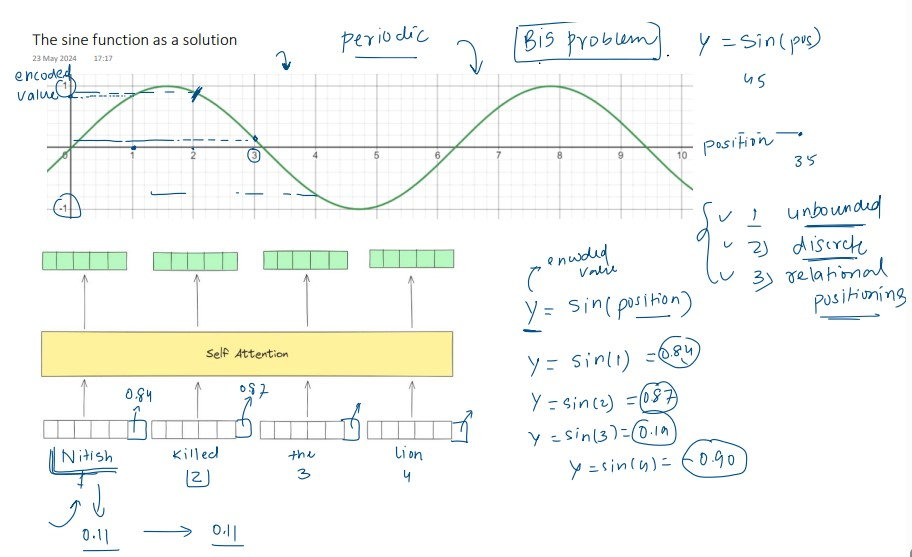

Here consider x axis as position of words in input and y axis as the encoded values. Let we have a input sentence as "Nitish killed the Lion". Numbers from 1 to 4 are assigned to the each word of the sentence.Then we calculated the encoded value using y = sin(position) funtion.And this y values are added to the 512 dimentional contextual word embeddings of each word. But there is one problem in this approach is that encoder value for two different word can be same because the sine function is periodic which means the values can be repeated.To solve this issue , instead of maintaining the only sine value, we will introduce one more value of cos. We will calculate the y = cos(position) value and we will add a vector of two numbers like [y_of_sine , y_of_cos] in the contextual word embedding of 512 dimention like below:

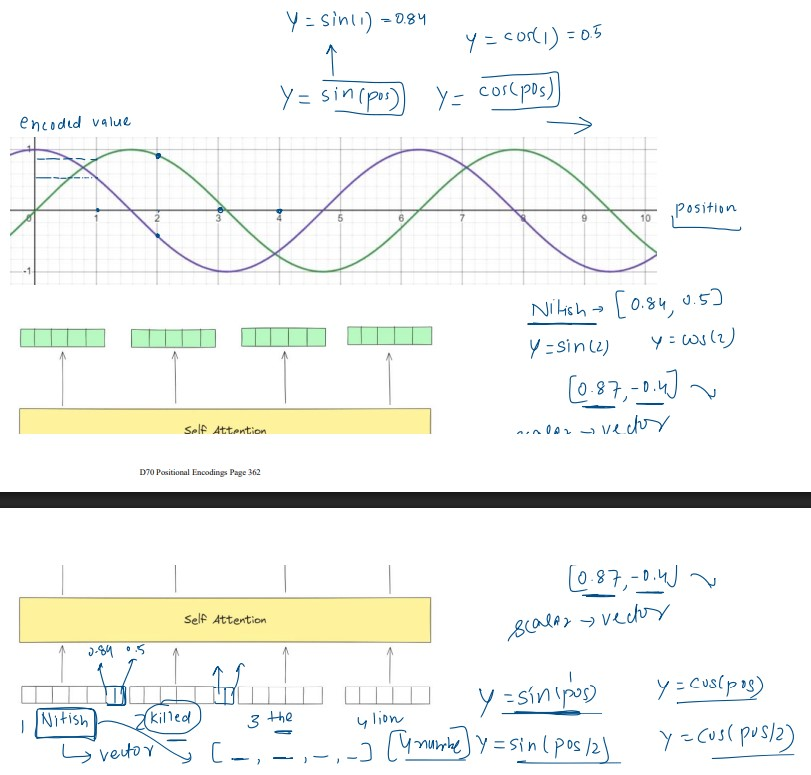

Again for the any two words , the sine and cos value might have same values then we will introduce one more curve as y = sin(position/2) and add 3 values of sin , cos and sin(position/2) to the contextual word embeddings of the word.In this way we can change the function and get different values and add those to the contextual word embeddings.

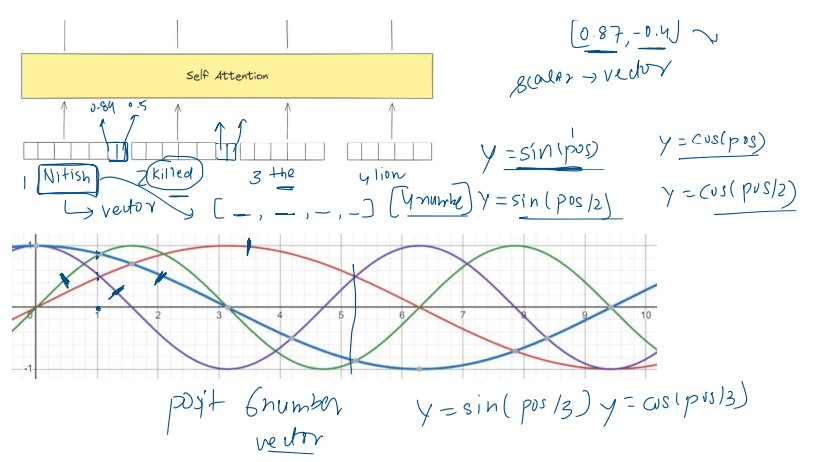



**Positional Encoding-**

Let we have a sentence "River Bank".And we have generateda word embedding of each word. Consider word embedding is of 6 dimentions.We are maintaining 6 different sine and cos graph to maintain the position information. SO what we will do is we will add these two 6 dimentional vectors to get the new 6 dimentional vector which we will pass to the self-attention block which eventually generate the contextual word embedding. Why we are not concating these two 6 dimentional vectors and we are adding these two 6 dimentional vectors is that if we concatinate these two , we will get 12 dimentional vector to pass to the self_attention block and if the input vector size increases , the number of parameters will also be increased and we dont want to increase the number of parameters unnecessary.


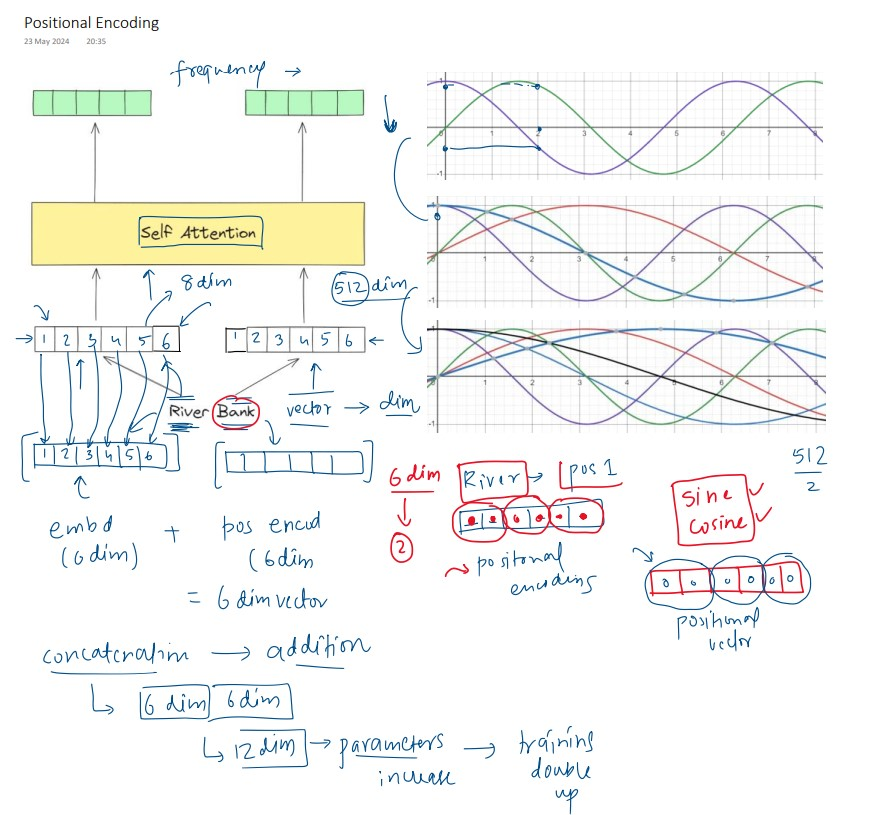

**Deciding the Frequency of sine and cosine graph for positional encoding values calculation:**

pos is position of the word.

dmodel is the dimentinality of the embeddings.If word embeddings of the word in 6 then dmodel value will be 6.

i is the value from 0 to dmodle/2 .

Formula to calculate the positional values of vectors is as follows:

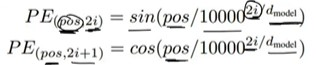



We have to calculate the 6 positional value for the perticular word and we will use above formula to do it.

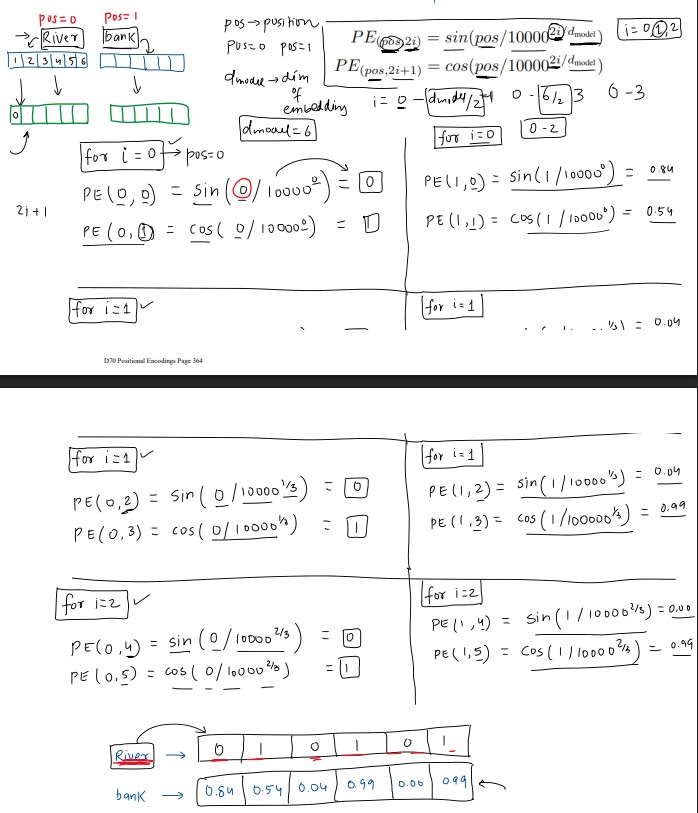


We have calculated all the values and got the result in form of 6 dimentional positional vector of word river and bank which can be added to the word embedding vector of 6 dimention , and the resultant vector can be passed to the self_attention model which will generate the contextual word embeddings that will have the positional information of the input words in a sentence.

**Interesting Graph-**

Let we have a sentence of 50 words. The word embedding dimentions is 128. SO we will have to calculate the 50 positional encoding vectors.Each positional encoding vector will have a dimention of 128.

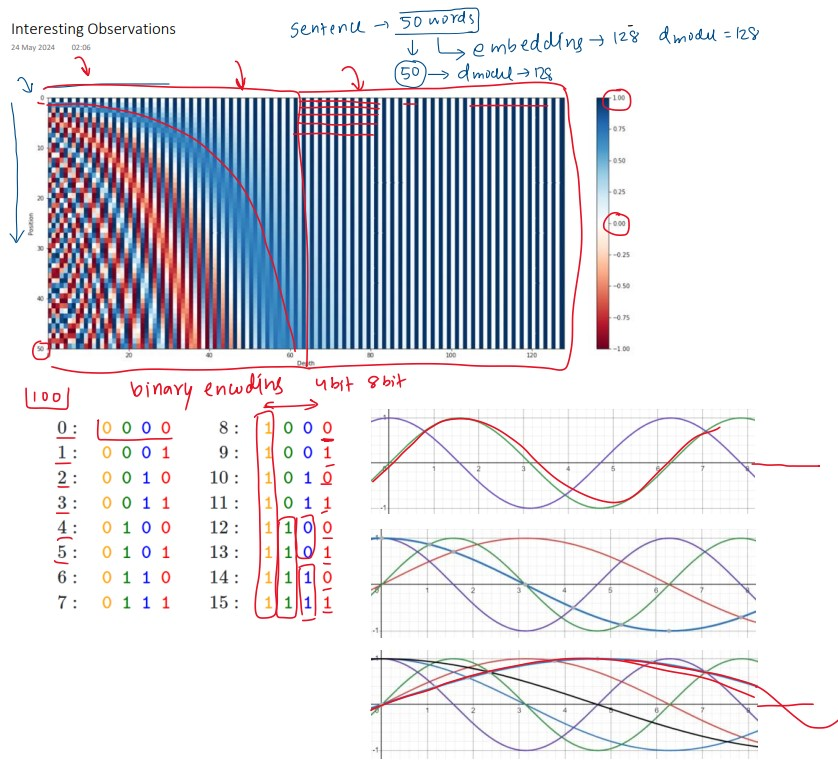